Loading the data

In [1]:
from utilities import *

In [2]:
Data = pd.read_csv('Churn.csv')
df =Data.copy()


Data Overview

In [3]:
df.shape
print(df.info())


#checking for duplicates
Data.duplicated().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB
None


0

In [4]:
#checking for missing values
# Let's check for missing values in the data
round(Data.isnull().sum() / Data.isnull().count() * 100, 2)

RowNumber          0.0
CustomerId         0.0
Surname            0.0
CreditScore        0.0
Geography          0.0
Gender             0.0
Age                0.0
Tenure             0.0
Balance            0.0
NumOfProducts      0.0
HasCrCard          0.0
IsActiveMember     0.0
EstimatedSalary    0.0
Exited             0.0
dtype: float64

In [5]:
# observing the decriptive statistics of the numerical column
df.describe().T 

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [6]:
# checking the value counts of datatype = object
for i in df.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
            ..
Izmailov     1
Bold         1
Bonham       1
Poninski     1
Burbidge     1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************


In [7]:
# checking the value count of the columns creditscore and age.
for i in df[['CreditScore','Age']]:
    print("Unique values in", i, "are :")
    print(df[i].value_counts())
    print("*" * 50)

Unique values in CreditScore are :
850    233
678     63
655     54
705     53
667     53
      ... 
404      1
351      1
365      1
417      1
419      1
Name: CreditScore, Length: 460, dtype: int64
**************************************************
Unique values in Age are :
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: Age, Length: 70, dtype: int64
**************************************************


Univariate analysis

A histogram and boxplot of numerical variables.

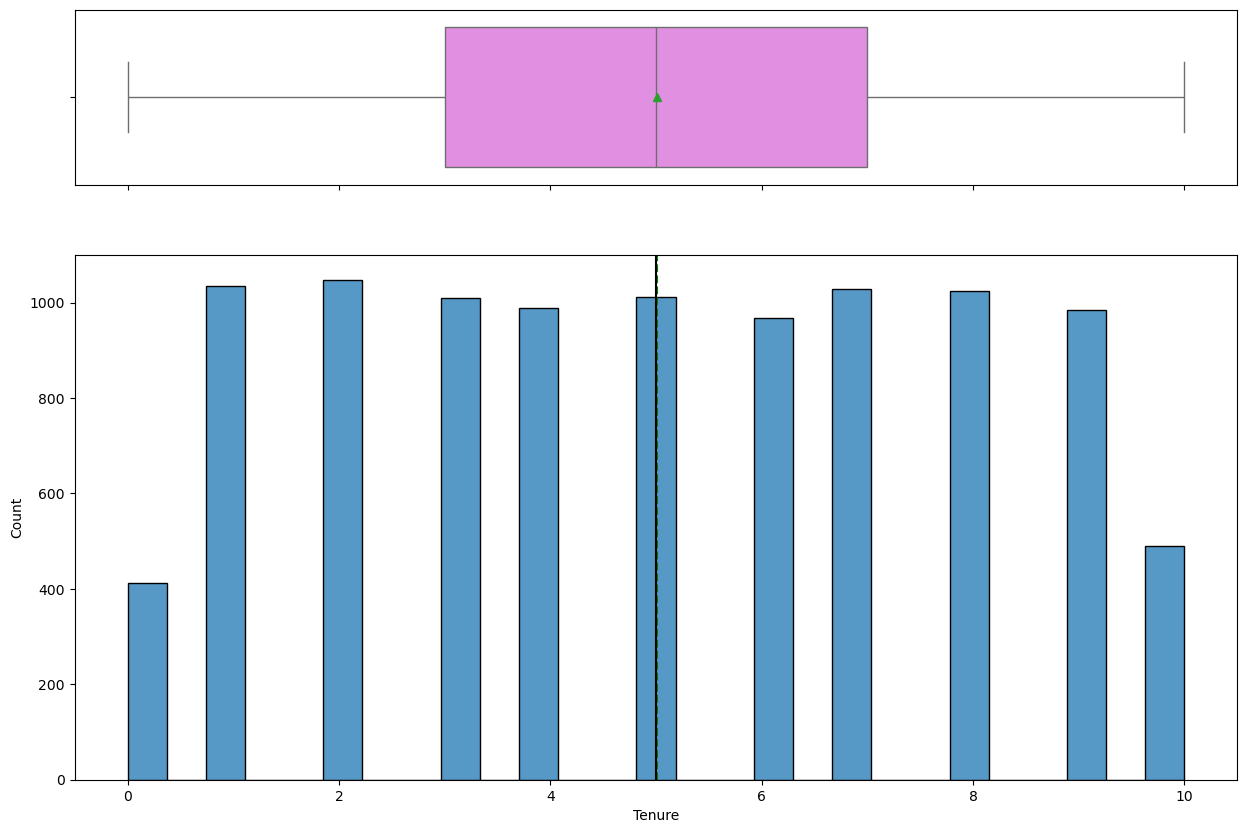

In [8]:
histogram_boxplot(df,'Tenure')

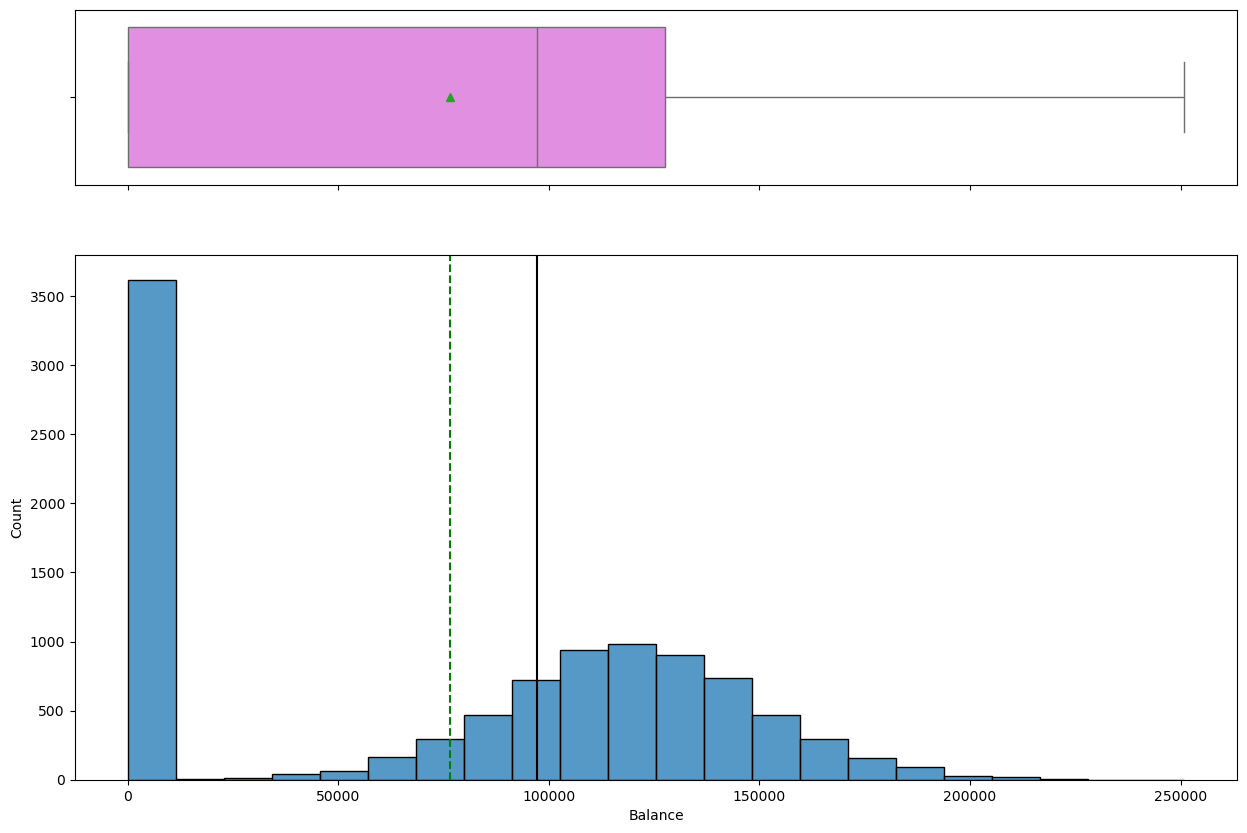

In [9]:
histogram_boxplot(df,'Balance')

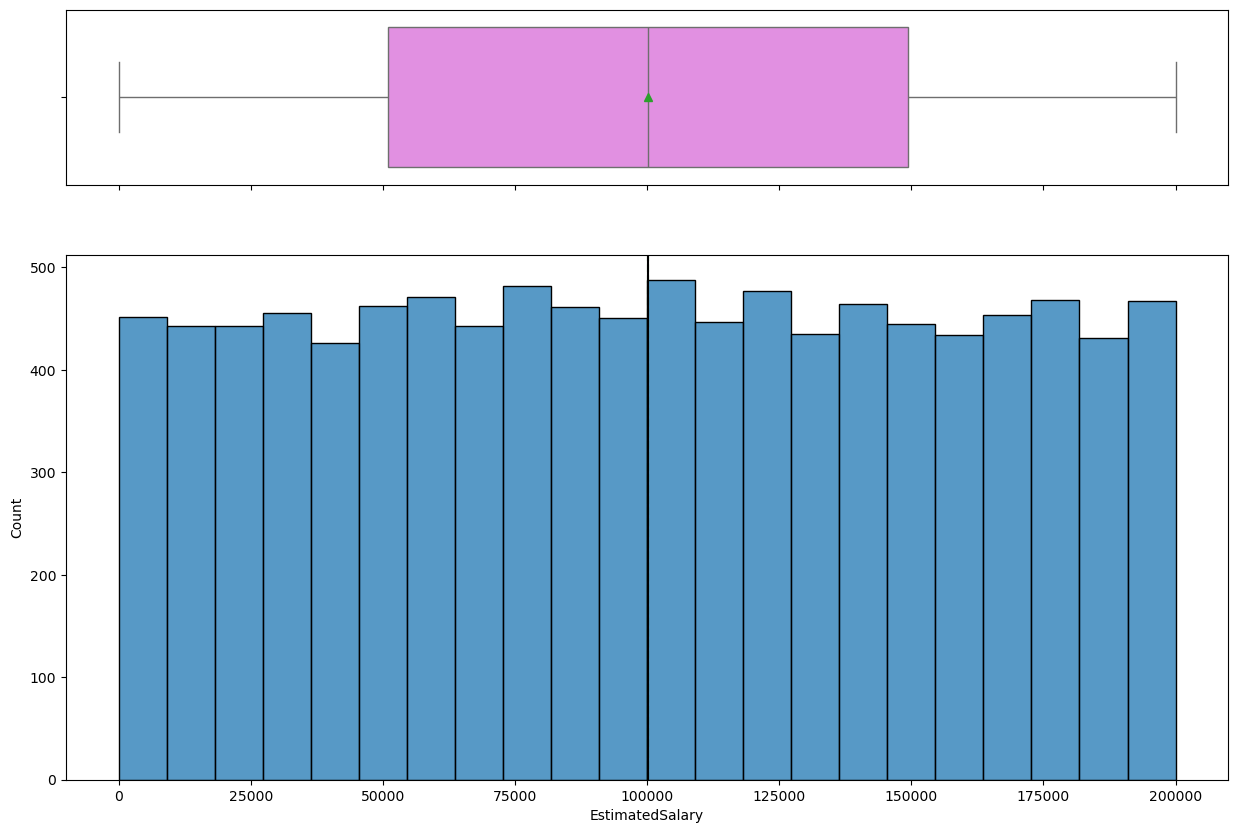

In [10]:
histogram_boxplot(df,'EstimatedSalary')

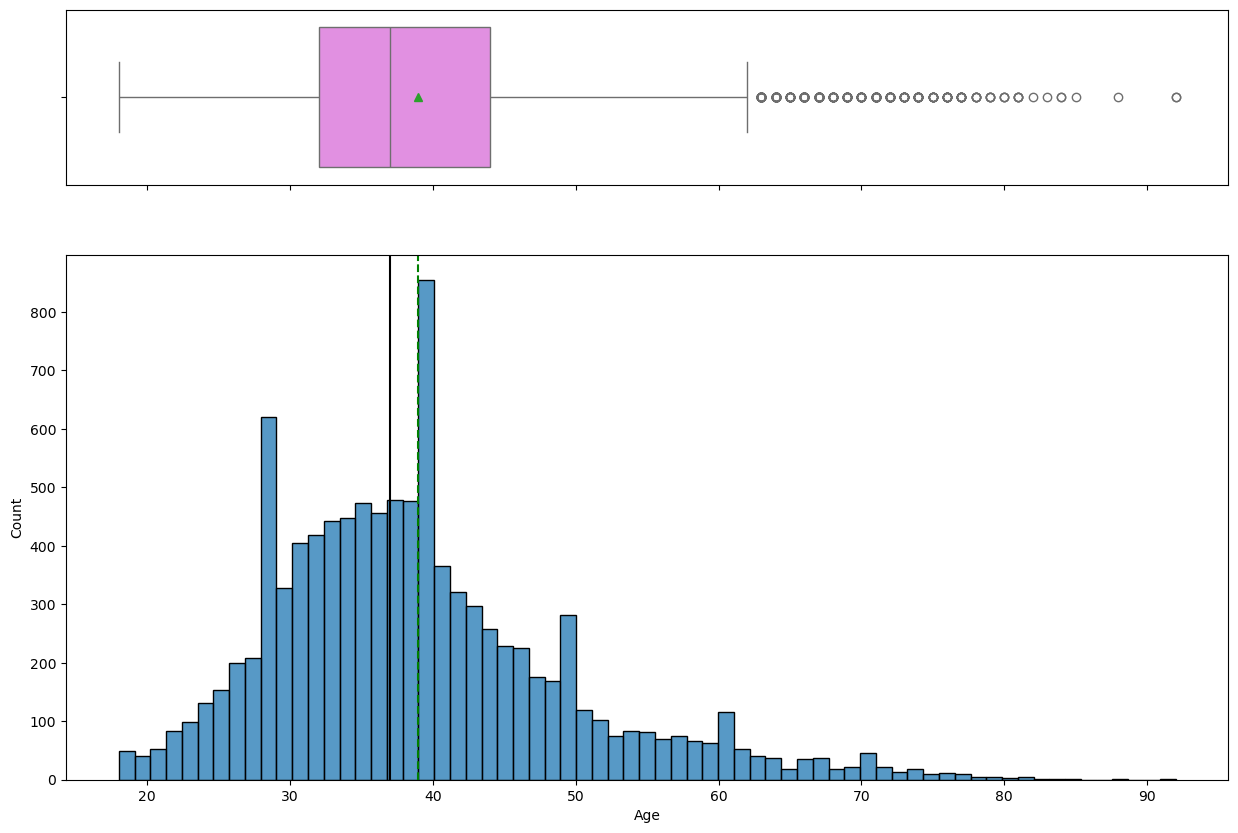

In [11]:
histogram_boxplot(df,'Age')

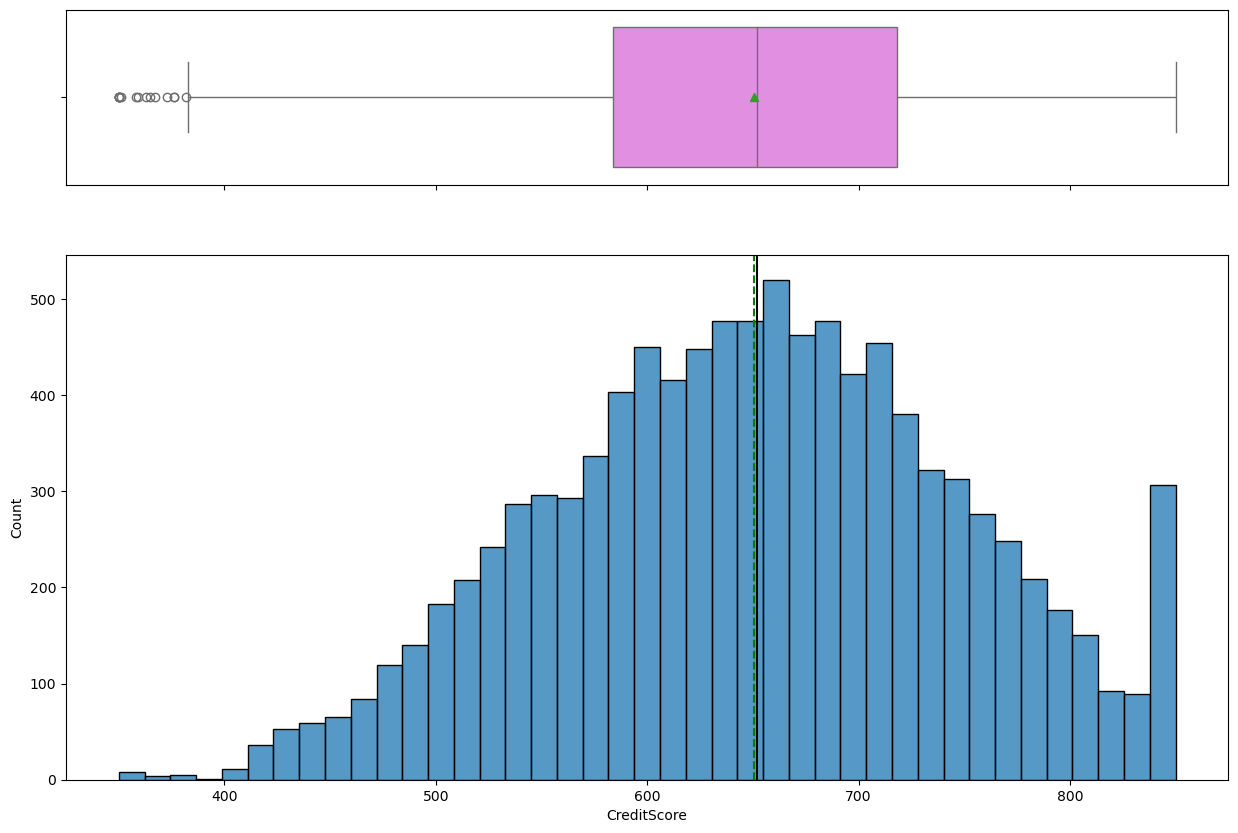

In [12]:
histogram_boxplot(df,'CreditScore')

Barplot of categorical variables

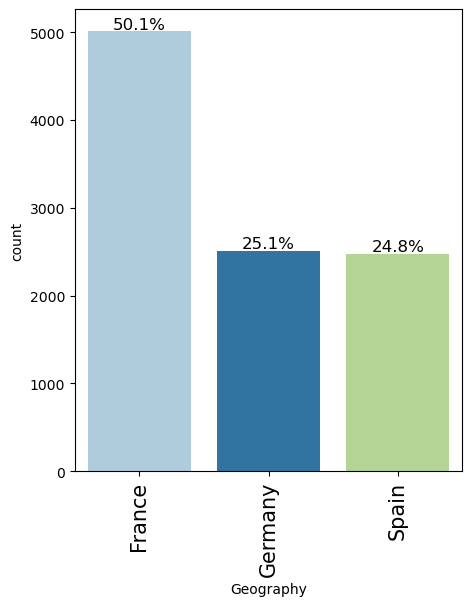

In [13]:
labeled_barplot(df,'Geography',perc=True)

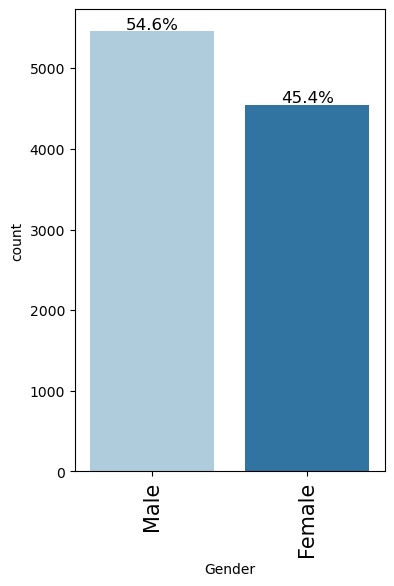

In [14]:
labeled_barplot(df,'Gender',perc=True)

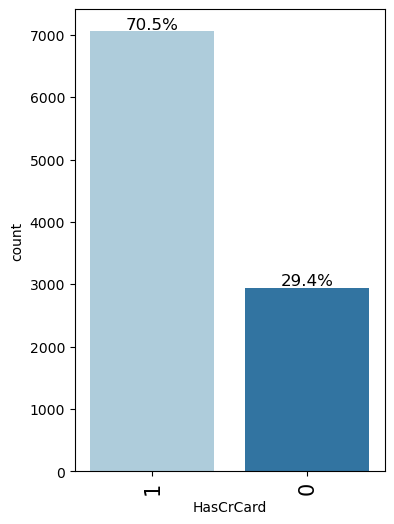

In [15]:
labeled_barplot(df,'HasCrCard',perc=True)

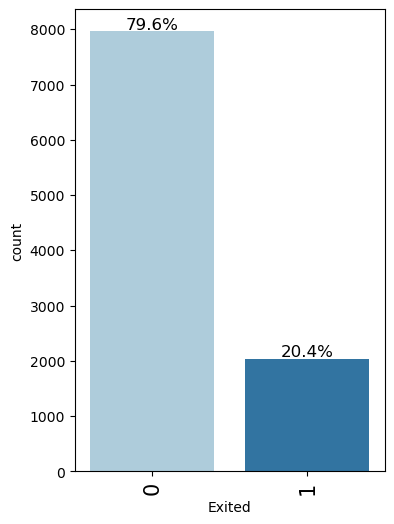

In [16]:
labeled_barplot(df,'Exited',perc=True)

Bivariate Analysis

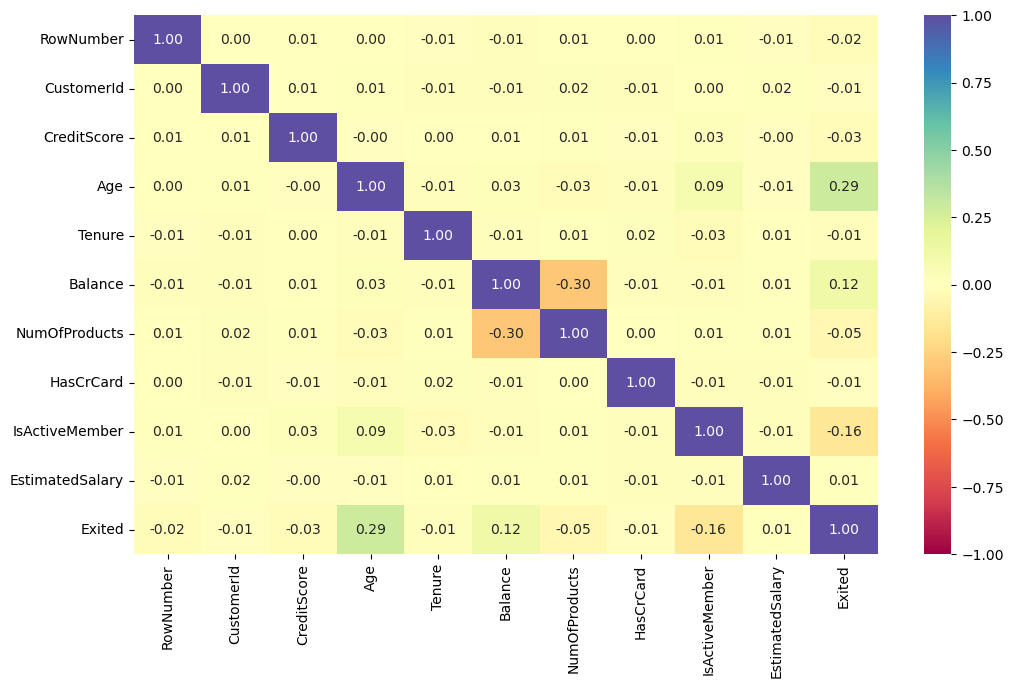

In [17]:
# correlation
cols_list = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    df[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

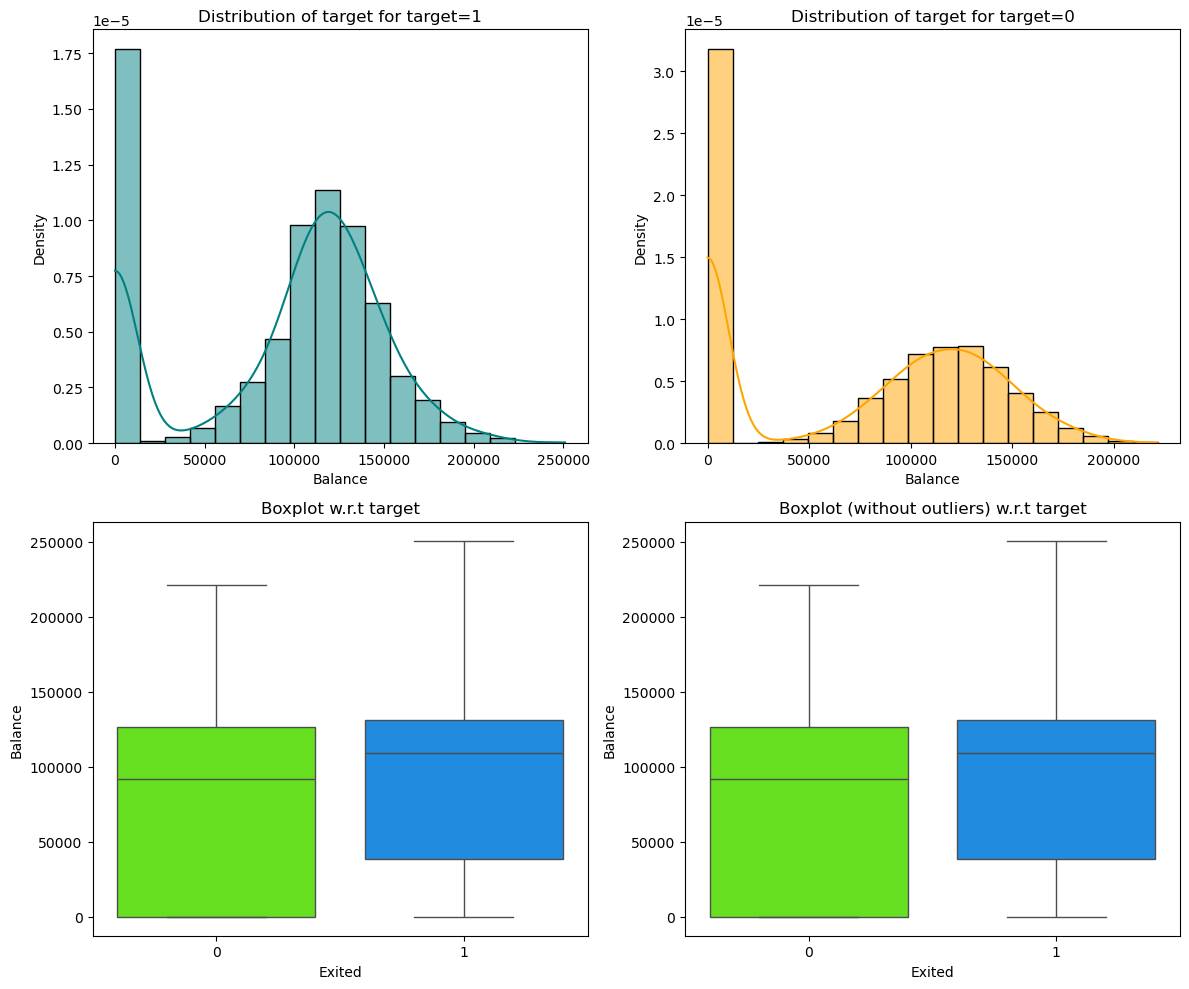

In [18]:
#examining the relationship between variables.
distribution_plot_wrt_target(df, "Balance", "Exited")

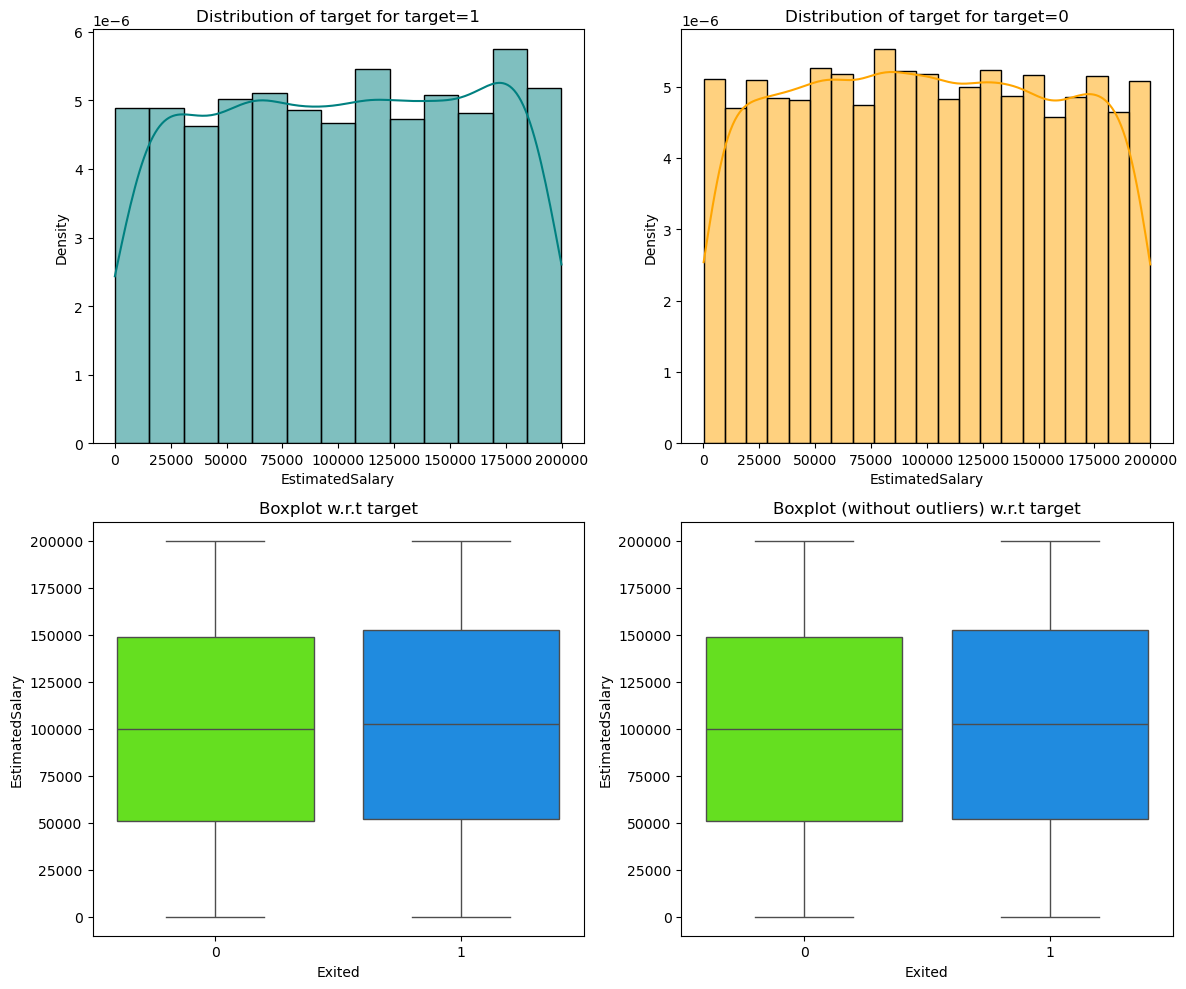

In [19]:
#examining the relationship between variables.
distribution_plot_wrt_target(df, "EstimatedSalary", "Exited")

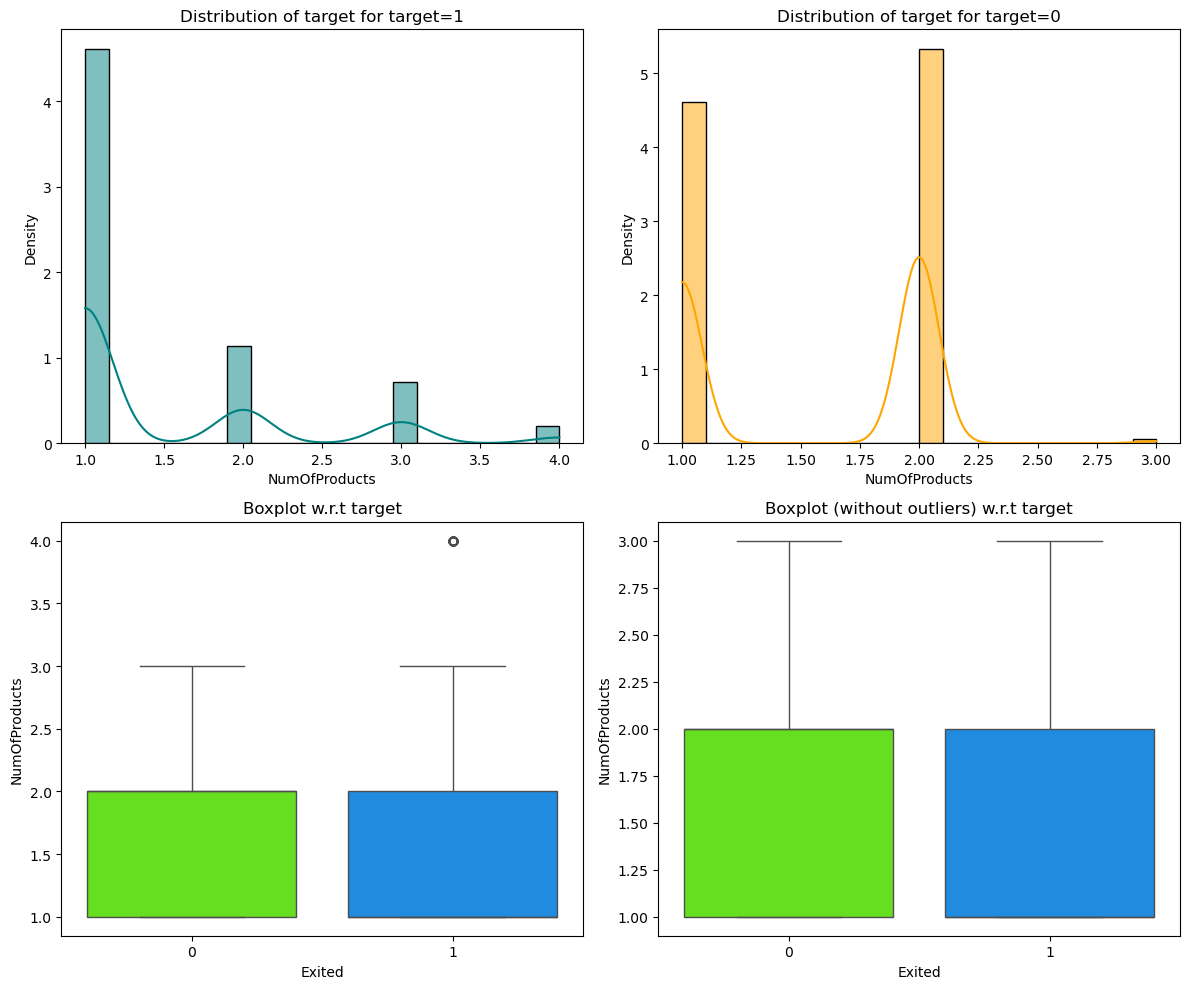

In [20]:
#examining the relationship between variables.
distribution_plot_wrt_target(df, "NumOfProducts", "Exited")